# Özellik Mühendisliği & Veri Ön İşleme(Feature Engineering & Data Preprocessing)

- Eğer veriniz kötüyse makine öğrenim araçlarınız kullanışlı olmayacaktır.
- Dünyanın en önemli kaynağı petrol değil veridir.
Özellik mühendisliği: Özellik üzerinde gerçekleştirilen çalışmalar ve ham veriden değişken üretmektir.
Veri Ön İşleme: Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.

## OUTLIERS(Aykırı Değerler)
- Verideki genel eğilimin oldukça dışına çıkan değerlere **aykırı değer** denir.
- Özellikle doğrusal problemlerde aykırı değerlerin şiddeti oldukça güçlüdür.
- Ağaç yöntemlerinde bu etkiler daha düşüktür.

**Aykırı Değerler Neye Göre Belirlenir?**
- Sektör Bilgisi
- Standart Sapma Yaklaşımı
- Z-Skoru Yaklaşımı
- Boxplot(interquirtile range -IQR) Yaklaşımı => En çok tercih edilen yaklaşımdır.

## IQR (Interquartile Range)
<img src="https://i0.wp.com/ravenfo.com/wp-content/uploads/2021/02/kutu-grafigi.png?resize=612%2C400&ssl=1">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.options.display.max_columns = None

In [3]:
def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data


df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


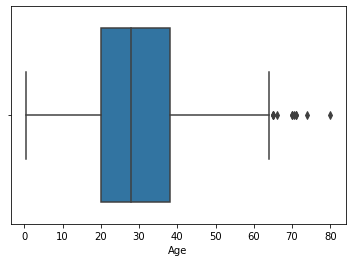

In [5]:
sns.boxplot(x=df["Age"])
plt.show()

### Aykırı Değerler Nasıl Yakalanır?

In [6]:
# Çeyrekler Açıklığı hesaplanır
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
# Üst aykırılık hesaplanır.
up = q3 + 1.5 * iqr
#Alt aykırılık hesaplanır.
low = q1 - 1.5 * iqr
print(display(df[(df["Age"] < low) | (df["Age"] > up)].head()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


None


In [7]:
print(df[(df["Age"] < low) | (df["Age"] > up)].index)

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


#### Aykırı Değer Var Mı?

In [8]:
print(df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None))
#.any(axis=None) => boolean değer döndürür
print(df[(df["Age"] < low)].any(axis=None))

True
False


### Aykırı Değer Kontrolü

1. Eşik değer belirledik.
2. Aykırılara eriştik.
3. Hızlıca aykırı değer var mı yok diye sorduk.

## İşlemleri Fonksiyonlaştırma

In [9]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit


print(outlierThresholds(df, "Age"))
print(outlierThresholds(df, "Fare"))

(-6.6875, 64.8125)
(-26.724, 65.6344)


In [10]:
low, up = outlierThresholds(df, "Age")
print(display(df[(df["Age"] < low) | (df["Age"] > up)]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


None


In [11]:
print(df[(df["Age"] < low) | (df["Age"] > up)].index)

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [12]:
def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False


print(checkOutlier(df, "Age"))
print(checkOutlier(df, "Fare"))

True
True


In [13]:
dff = load_application_train()
dff.head()


def grabColNames(dataframe, catTh=10, carTh=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)

numCols = [col for col in numCols if col not in "PassengerId"]

for col in numCols:
    print(col, checkOutlier(df, col))

catCols, numCols, catButCar = grabColNames(dff)

numCols = [col for col in numCols if col not in "SK_ID_CURR"]

for col in numCols:
    print(col, checkOutlier(dff, col))

Observations: 891
Variables: 12
catCols: 6
numCols: 3
catButCar: 3
numButCat: 4
Age True
Fare True
Observations: 307511
Variables: 122
catCols: 54
numCols: 67
catButCar: 1
numButCat: 39
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE

# Aykırı Değerlerin Kendilerine Erişmek

In [14]:
def grabOutliers(dataframe, colName, index=False):
    low, up = outlierThresholds(dataframe, colName)

    if dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].shape[0] > 10:
        print(display(dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].head()))
    else:
        print((dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))]))

    if index:
        outlier_index = dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].index
        return outlier_index


grabOutliers(df, "Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


None


In [15]:
grabOutliers(df, "Age", True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


None


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [16]:
print(checkOutlier(df, "Age"))

True


In [17]:
print(outlierThresholds(df, "Age"))

(-6.6875, 64.8125)


In [18]:
print(grabOutliers(df, "Age", True))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


None
Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


# Aykırı Değer Problemi Çözme

## Silme

In [19]:
low, up = outlierThresholds(df, "Fare")
# Gözlem sayısına bakalım
print(df.shape)

# Aykırı olmayan gözlem sayılarına bakalım
print(df[~((df["Fare"] < low) | (df["Fare"] > up))].shape)

(891, 12)
(775, 12)


In [ ]:
# Aykırı olmayan gözlemleri dönen fonksiyonları yazalım.
def removeOutliner(dataframe,colName):
    lowLimit,upLimit = outlierThresholds(dataframe, colName)
    dfWithoutOutliners = dataframe[~((dataframe[colName] < lowLimit) | (dataframe[colName] > upLimit))]
    return dfWithoutOutliners

In [ ]:
catCols,numCols,catButCar = grabColNames(df)
numCols = [col for col in numCols if col not in "PassengerId"]
print(df.shape)

In [ ]:
for col in numCols:
    newDf = removeOutliner(df, col)
print(df.shape[0] - newDf.shape[0] ) # Kaç değişiklik olduğunu görebiliriz.

Bir aykırı gözlem silerken tam olan verilerden de oluyoruz. Bunun yerine bazı senaryolarda silmek yerine baskılama yöntemini seçebiliriz.

# Baskılama Yöntemi (re-assigment with thresholds)

In [ ]:
# Fare değişkeni için üst ve alt sınırları belirliyoruz.
low, up = outlierThresholds(df, "Fare")
# Aykırı değerleri 
print(df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"])

In [ ]:
print(df.loc[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"])

In [ ]:
# Üst sınırın üzerinde olan değerleri üst değere baskılayalım.
df.loc[(df["Fare"] > up), "Fare"] = up
print(up)
# üst sınır üzerinde değerleri kaldı mı?

In [ ]:
df.loc[(df["Fare"] < low), "Fare"] = low
print(low)

In [ ]:
def replaceWithThreshold(dataframe, colName):
    lowLimit,upLimit = outlierThresholds(dataframe, colName)
    dataframe.loc[(dataframe[colName] < low), colName] = lowLimit
    dataframe.loc[(dataframe[colName] > up), colName] = upLimit
    return dataframe

In [ ]:
df = load()
catCols,numCols,catButCar = grabColNames(df)
numCols = [col for col in numCols if col not in "PassengerId"]
print(df.shape)

In [ ]:
for col in numCols:
    print(col,checkOutlier(df,col))

In [ ]:
for col in numCols:
    replaceWithThreshold(df,col)
for col in numCols:
    print(col,checkOutlier(df,col))

# Çok Değişkenli Aykırı Değer Analizi (Local Outlier Factor)


Yaş tek başına 17 olursa aykırı değer değildir. Ama 17 yaşında olup 3 kez evlenmek bir aykırı değerdir.

## LOF nedir?
- Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek tanımlayabilmemize imkan sağlıyor.
- Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılıyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [ ]:
# Veri setini tanımlayalım.
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
print(df.head())

In [ ]:
for col in df.columns:
    print(col , checkOutlier(df, col))


In [ ]:
low, up = outlierThresholds(df, "carat")
print(df[((df['carat'] < low) | (df['carat'] > up))].shape)

In [ ]:
low, up = outlierThresholds(df, "depth")
print(df[((df['depth'] < low) | (df['depth'] > up))].shape)

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20) 
# n_neighbors aranan komşuluk sayısıdır. genellikle 20 olarak kullanılır.
# LOF u veri setine uygulamak için
print(clf.fit_predict(df))

In [ ]:
# Lof değerlerini takip edebilmek için
df_scores = clf.negative_outlier_factor_ # -1 ile 1 arasında değerler alır.
print(df_scores)

In [ ]:
# Eksi değerli gözkükmesini istemiyorsak
# df_scores = -df_scores

In [ ]:
print(np.sort(df_scores)[0:5])

In [ ]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,20],style=".-")
plt.show()

In [ ]:
# Daha detaylı bakalım.
scores.plot(stacked=True,xlim=[0,50],style=".-")
plt.show()

In [ ]:
# Grafiğe bakarak kırılma noktasını belirleyelim.
th = np.sort(df_scores)[3]
print(df[df_scores < th])

In [ ]:
# Bunlar neden aykırı?
print(display(df.describe([0.01,0.05,0.75,0.9,0.99]).T))

In [26]:
for col in numCols:
    newDf = removeOutliner(df, col)
print(df.shape[0] - newDf.shape[0] ) # Kaç değişiklik olduğunu görebiliriz.

116


Bir aykırı gözlem silerken tam olan verilerden de oluyoruz. Bunun yerine bazı senaryolarda silmek yerine baskılama yöntemini seçebiliriz.

# Baskılama Yöntemi (re-assigment with thresholds)

In [27]:
# Fare değişkeni için üst ve alt sınırları belirliyoruz.
low, up = outlierThresholds(df, "Fare")
# Aykırı değerleri 
print(df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"])

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [28]:
print(df.loc[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"])

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [38]:
# Üst sınırın üzerinde olan değerleri üst değere baskılayalım.
df.loc[(df["Fare"] > up), "Fare"] = up
print(up)
# üst sınır üzerinde değerleri kaldı mı?

65.6344


In [32]:
df.loc[(df["Fare"] < low), "Fare"] = low
print(low)

Series([], Name: Fare, dtype: float64)


In [44]:
def replaceWithThreshold(dataframe, colName):
    lowLimit,upLimit = outlierThresholds(dataframe, colName)
    dataframe.loc[(dataframe[colName] < low), colName] = lowLimit
    dataframe.loc[(dataframe[colName] > up), colName] = upLimit
    return dataframe

In [45]:
df = load()
catCols,numCols,catButCar = grabColNames(df)
numCols = [col for col in numCols if col not in "PassengerId"]
print(df.shape)

Observations: 891
Variables: 12
catCols: 6
numCols: 3
catButCar: 3
numButCat: 4
(891, 12)


In [51]:
for col in numCols:
    print(col,checkOutlier(df,col))

Age True
Fare False


In [52]:
for col in numCols:
    replaceWithThreshold(df,col)
for col in numCols:
    print(col,checkOutlier(df,col))

Age True
Fare False


# Çok Değişkenli Aykırı Değer Analizi (Local Outlier Factor)


Yaş tek başına 17 olursa aykırı değer değildir. Ama 17 yaşında olup 3 kez evlenmek bir aykırı değerdir.

## LOF nedir?
- Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek tanımlayabilmemize imkan sağlıyor.
- Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılıyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [53]:
# Veri setini tanımlayalım.
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
print(df.head())

   carat  depth  table  price     x     y     z
0  0.230 61.500 55.000    326 3.950 3.980 2.430
1  0.210 59.800 61.000    326 3.890 3.840 2.310
2  0.230 56.900 65.000    327 4.050 4.070 2.310
3  0.290 62.400 58.000    334 4.200 4.230 2.630
4  0.310 63.300 58.000    335 4.340 4.350 2.750


In [54]:
for col in df.columns:
    print(col , checkOutlier(df, col))


carat True
depth True
table True
price True
x True
y True
z True


In [56]:
low, up = outlierThresholds(df, "carat")
print(df[((df['carat'] < low) | (df['carat'] > up))].shape)

(1889, 7)


In [57]:
low, up = outlierThresholds(df, "depth")
print(df[((df['depth'] < low) | (df['depth'] > up))].shape)

(2545, 7)


In [58]:
clf = LocalOutlierFactor(n_neighbors=20) 
# n_neighbors aranan komşuluk sayısıdır. genellikle 20 olarak kullanılır.
# LOF u veri setine uygulamak için
print(clf.fit_predict(df))

[-1 -1 -1 ...  1  1  1]


In [59]:
# Lof değerlerini takip edebilmek için
df_scores = clf.negative_outlier_factor_ # -1 ile 1 arasında değerler alır.
print(df_scores)

[-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552
 -1.00849038]


In [60]:
# Eksi değerli gözkükmesini istemiyorsak
# df_scores = -df_scores

In [61]:
print(np.sort(df_scores)[0:5])

[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092]


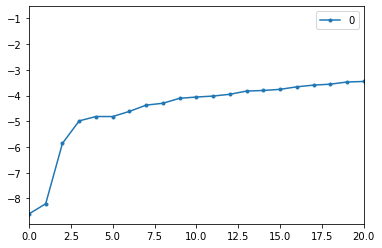

In [62]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,20],style=".-")
plt.show()

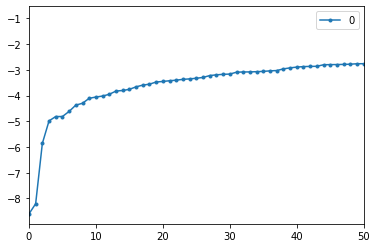

In [63]:
# Daha detaylı bakalım.
scores.plot(stacked=True,xlim=[0,50],style=".-")
plt.show()

In [64]:
# Grafiğe bakarak kırılma noktasını belirleyelim.
th = np.sort(df_scores)[3]
print(df[df_scores < th])

       carat  depth  table  price     x      y      z
41918  1.030 78.200 54.000   1262 5.720  5.590  4.420
48410  0.510 61.800 54.700   1970 5.120  5.150 31.800
49189  0.510 61.800 55.000   2075 5.150 31.800  5.120


In [66]:
# Bunlar neden aykırı?
print(display(df.describe([0.01,0.05,0.75,0.9,0.99]).T))

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


None
